In [1]:
import numpy as np
import wave
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import fft
import math
import makeFeature
from time import sleep

In [2]:
import pyaudio


In [3]:
from pydub import AudioSegment

ModuleNotFoundError: No module named 'pydub'

In [4]:
import pydub

ModuleNotFoundError: No module named 'pydub'

In [5]:
name = "./CoinData2/001-001.wav"
wavefile = wave.open(name, "r")
framerate = wavefile.getframerate()
data = wavefile.readframes(wavefile.getnframes())
x = np.frombuffer(data, dtype="int16")
x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない

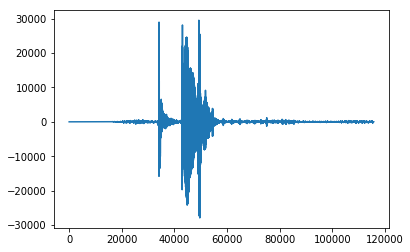

In [6]:
plt.plot(x)

In [7]:
BinSize = 0.05 * framerate

In [8]:
len(x) / framerate

2.6238548752834467

In [9]:
from makeFeature import makeFeature

In [10]:
coins = ["001", "005", "010", "050", "100", "500"]
OnPeriods = 20
CoinNumber = 100

features_nakamura = np.zeros([6, CoinNumber, OnPeriods, 1858])
for coinIndex, coin in enumerate(coins) :
    for i in range(0, CoinNumber) :
        padded = '%03d' % (i+1)
        filename = "./CoinData2/" + coin + "-" + padded + ".wav"
        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        
        features_nakamura[coinIndex, i, :, :] = f

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [12]:
Coins, numData, OnPeriods, waves = features_nakamura.shape

In [13]:
feature_per_coin_nakamura = np.zeros([Coins, numData * OnPeriods, waves])

for c in range(0, Coins) :
    for cc in range(0, numData) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin_nakamura[c, (OnPeriods) * cc + ccc] = features_nakamura[c, cc, ccc]

In [55]:
coins = ["001", "005", "010", "050", "100", "500"]
OnPeriods = 20
CoinNumber = 100

features = np.zeros([6, CoinNumber, OnPeriods, 1858])
for coinIndex, coin in enumerate(coins) :
    for i in range(0, CoinNumber) :
        padded = '%02d' % (i)
        filename = "./CoinData/" + coin + "-" + padded + ".wav"
        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        
        features[coinIndex, i, :, :] = f

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [14]:
coins = ["001", "005", "010", "050", "100", "500"]
features_naito = np.zeros([6, CoinNumber, OnPeriods, 1858])

for coinIndex, coin in enumerate(coins) :
    for i in range(0, CoinNumber) :
        padded = '%02d' % (i)
        filename = "./CoinData3/" + coin + "-" + padded + ".wav"        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        features_naito[coinIndex, i, :, :] = f

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


In [16]:
feature_per_coin_naito = np.zeros([Coins, numData * OnPeriods, waves])

for c in range(0, Coins) :
    for cc in range(0, numData) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin_naito[c, (OnPeriods) * cc + ccc] = features_naito[c, cc, ccc]

In [79]:
feature_per_coin = np.zeros([Coins, numData * OnPeriods, waves])
for c in range(0, 3) :
    for cc in range(0, numData) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin[c, (OnPeriods) * cc + ccc] = features[c, cc, ccc]

In [92]:
coins = ["001", "005", "100"]
OnPeriods = 20
CoinNumber = 20

features = np.zeros([3, CoinNumber, OnPeriods, 1858])
for coinIndex, coin in enumerate(coins) :
    for i in range(0, CoinNumber) :
        padded = '%02d' % i
        filename = "./CoinData-Set/" + coin + "-" + padded + ".wav"
        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        
        features[coinIndex, i, :, :] = f
        
feature_per_coin_ex_naito = np.zeros([3, 20 * OnPeriods, waves])

for c in range(0, 3) :
    for cc in range(0, 20) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin_ex_naito[c, (OnPeriods) * cc + ccc] = features[c, cc, ccc]

In [93]:
coins = ["001", "005", "100"]
OnPeriods = 20
CoinNumber = 20

features = np.zeros([3, CoinNumber, OnPeriods, 1858])
for coinIndex, coin in enumerate(coins) :
    for i in range(0, CoinNumber) :
        padded = '%02d' % i
        filename = "./Coindata_Sync/" + coin + "-" + padded + ".wav"
        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        
        features[coinIndex, i, :, :] = f
        
feature_per_coin_ex_nakamura = np.zeros([3, 20 * OnPeriods, waves])

for c in range(0, 3) :
    for cc in range(0, 20) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin_ex_nakamura[c, (OnPeriods) * cc + ccc] = features[c, cc, ccc]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [65]:
feature_per_coin_naito.shape

(6, 2000, 1858)

In [17]:
### 汎用的な学習データの作成
features_LEARN = np.zeros_like(features_naito)
features_TEST = np.zeros_like(features_naito)

features_LEARN[:, 0:50, :, :] = features_naito[:, 0:50, :, :]
features_LEARN[:, 50:100, :, :] = features_nakamura[:, 0:50, :, :]
features_TEST[:, 0:50, :, :] = features_naito[:, 50:100, :, :]
features_TEST[:, 50:100, :, :] = features_nakamura[:, 50:100, :, :]

feature_per_coin_LEARN = np.zeros_like(feature_per_coin_naito)
feature_per_coin_TEST = np.zeros_like(feature_per_coin_naito)

feature_per_coin_LEARN[:, 0:1000, :] = feature_per_coin_naito[:, 0:1000, :]
feature_per_coin_LEARN[:, 1000:2000, :] = feature_per_coin_nakamura[:, 0:1000, :]
feature_per_coin_TEST[:, 0:1000, :] = feature_per_coin_naito[:, 1000:2000, :]
feature_per_coin_TEST[:, 1000:2000, :] = feature_per_coin_nakamura[:, 1000:2000, :]

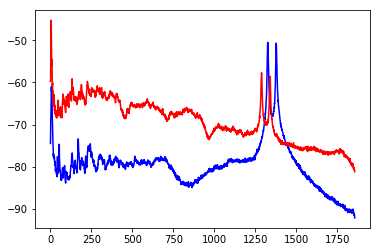

In [104]:
plt.plot(np.mean(feature_per_coin_ex_nakamura[0], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_ex_naito[0], axis=0), "red")
#plt.plot(np.mean(feature_per_coin[1], axis=0), "orange")

NameError: name 'feature_per_coin' is not defined

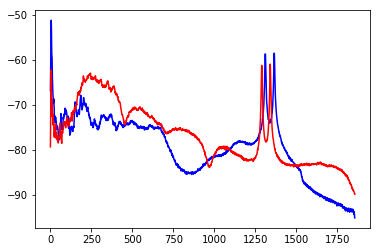

In [61]:
plt.plot(np.mean(feature_per_coin_nakamura[0], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_naito[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin[1], axis=0), "orange")

In [13]:
Coins, numData, OnPeriods, waves = features.shape
print(features.shape)
X = np.zeros([Coins * numData * OnPeriods, waves])
Y = np.zeros([Coins * numData * OnPeriods])
print(X.shape)

for c in range(0, Coins) :
    for cc in range(0, numData) :
        for ccc in range(0, OnPeriods) :
            X[c * (numData * OnPeriods) + cc * (OnPeriods) + ccc] = features[c, cc, ccc]
            Y[c * (numData * OnPeriods) + cc * (OnPeriods) + ccc] = c

(6, 100, 20, 1858)
(12000, 1858)


In [12]:
X

array([[ -51.30041337,  -47.75027677,  -43.50361603, ...,  -83.33547764,
         -83.66356785,  -84.62359403],
       [ -42.48338164,  -44.60996262,  -47.4276206 , ..., -100.27962276,
        -101.06484216, -100.10695336],
       [ -56.86722294,  -66.28797886,  -51.64248769, ..., -102.518103  ,
        -106.10009211, -102.21649502],
       ..., 
       [ -88.23874096,  -78.67507182,  -76.44267378, ..., -112.78083607,
        -112.47772415, -110.2255472 ],
       [ -82.10933885,  -76.73286789,  -68.51224922, ..., -111.5275144 ,
        -108.9519902 , -114.04838852],
       [ -71.98011779,  -76.07597681,  -74.82340691, ..., -115.90408849,
        -122.13106548, -121.18024183]])

In [13]:
import numpy as np
np.float64

numpy.float64

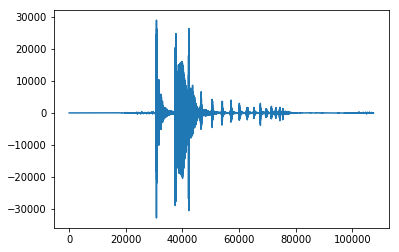

In [14]:
plt.plot(x)

In [15]:
"""
def extFeature(feature, freqs) :
    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して
    # OnPeriods * len(freqs)の特徴として返す
    numFreqs = len(freqs)
    f = np.zeros(OnPeriods * numFreqs)
    for index, l in enumerate(feature) :
        f[index * numFreqs : (index + 1) * numFreqs] = l[freqs]
        
    return f
"""

'\ndef extFeature(feature, freqs) :\n    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して\n    # OnPeriods * len(freqs)の特徴として返す\n    numFreqs = len(freqs)\n    f = np.zeros(OnPeriods * numFreqs)\n    for index, l in enumerate(feature) :\n        f[index * numFreqs : (index + 1) * numFreqs] = l[freqs]\n        \n    return f\n'

In [16]:
"""
def extFeature2(feature, freqs) :
    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して
    # len(freqs)の特徴として返す
    numFreqs = len(freqs)
    f = np.zeros(numFreqs)
    for index, l in enumerate(feature) :
        f[:] += l[freqs]
        
    return f
"""

'\ndef extFeature2(feature, freqs) :\n    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して\n    # len(freqs)の特徴として返す\n    numFreqs = len(freqs)\n    f = np.zeros(numFreqs)\n    for index, l in enumerate(feature) :\n        f[:] += l[freqs]\n        \n    return f\n'

In [17]:
"""
def detectFreqs(features, numFreqs) :
    # numFreqsで指定した個数の周波数成分を、コストが最小になるように決定する
    freqs = np.array(range(0, numFreqs)).astype('int64')
    numCoins = features.shape[0]
    
    featuresSelected = np.zeros([numCoins, features.shape[1], features.shape[2] * numFreqs])
    for c in range(0, numCoins) :
        for cc in range(0, features.shape[1]) :
            featuresSelected[c, cc, :] = extFeature(features[c, cc, :, :], freqs)
    
    numFeature = features.shape[2] * numFreqs
    mu = np.zeros([numCoins, numFeature])
    sigma = np.zeros([numCoins, numFeature, numFeature])
    
    for c in range(0, numCoins) :
        tempF = featuresSelected[c, :, :]
        mu[c, :] = makeMu(tempF)
        sigma[c, :, :] = makeSigma(tempF)
        print(np.linalg.eig(sigma[c])[0])
        
    culR(featuresSelected, sigma, mu)
        
    return freqs
"""

"\ndef detectFreqs(features, numFreqs) :\n    # numFreqsで指定した個数の周波数成分を、コストが最小になるように決定する\n    freqs = np.array(range(0, numFreqs)).astype('int64')\n    numCoins = features.shape[0]\n    \n    featuresSelected = np.zeros([numCoins, features.shape[1], features.shape[2] * numFreqs])\n    for c in range(0, numCoins) :\n        for cc in range(0, features.shape[1]) :\n            featuresSelected[c, cc, :] = extFeature(features[c, cc, :, :], freqs)\n    \n    numFeature = features.shape[2] * numFreqs\n    mu = np.zeros([numCoins, numFeature])\n    sigma = np.zeros([numCoins, numFeature, numFeature])\n    \n    for c in range(0, numCoins) :\n        tempF = featuresSelected[c, :, :]\n        mu[c, :] = makeMu(tempF)\n        sigma[c, :, :] = makeSigma(tempF)\n        print(np.linalg.eig(sigma[c])[0])\n        \n    culR(featuresSelected, sigma, mu)\n        \n    return freqs\n"

In [18]:
"""
#### 特徴ベクトルを足すことで次元を増やさないようにしてみる
def detectFreqs2(features, numFreqs) :
    freqs = np.array(range(0, numFreqs)).astype('int64')
    numCoins = features.shape[0]
    
    featuresSelected = np.zeros([numCoins, features.shape[1], numFreqs])
    for c in range(0, numCoins) :
        for cc in range(0, features.shape[1]) :
            featuresSelected[c, cc, :] = extFeature2(features[c, cc, :, :], freqs)
            
            
    numFeature = numFreqs
    mu = np.zeros([numCoins, numFeature])
    sigma = np.zeros([numCoins, numFeature, numFeature])
    
    for c in range(0, numCoins) :
        tempF = featuresSelected[c, :, :]
        mu[c, :] = makeMu(tempF)
        sigma[c, :, :] = makeSigma(tempF)
        print(sigma[c])
        print(np.linalg.det(sigma[c]))
        
    freqs_new = np.array(range(0, numFreqs)).astype('int64')
    
    #### 周波数成分選択アルゴリズム
    while(True) :
        for d in range(0, numFreqs) :
            for omega in range(0, features.shape[3]) :
                if omega
                
    R = culR(featuresSelected, sigma, mu)
    
    return freqs
"""

"\n#### 特徴ベクトルを足すことで次元を増やさないようにしてみる\ndef detectFreqs2(features, numFreqs) :\n    freqs = np.array(range(0, numFreqs)).astype('int64')\n    numCoins = features.shape[0]\n    \n    featuresSelected = np.zeros([numCoins, features.shape[1], numFreqs])\n    for c in range(0, numCoins) :\n        for cc in range(0, features.shape[1]) :\n            featuresSelected[c, cc, :] = extFeature2(features[c, cc, :, :], freqs)\n            \n            \n    numFeature = numFreqs\n    mu = np.zeros([numCoins, numFeature])\n    sigma = np.zeros([numCoins, numFeature, numFeature])\n    \n    for c in range(0, numCoins) :\n        tempF = featuresSelected[c, :, :]\n        mu[c, :] = makeMu(tempF)\n        sigma[c, :, :] = makeSigma(tempF)\n        print(sigma[c])\n        print(np.linalg.det(sigma[c]))\n        \n    freqs_new = np.array(range(0, numFreqs)).astype('int64')\n    \n    #### 周波数成分選択アルゴリズム\n    while(True) :\n        for d in range(0, numFreqs) :\n            for omega in range(0, feature

適当に小さいデータで実験

周波数成分　だいたい 400Hz以下

特徴次元数10

In [75]:
from makeFeature import makePrediction

In [76]:
from makeFeature import detectFreqs

In [77]:
freqs, sigma, mu, detSigma, invSigma = detectFreqs(features_LEARN, 20)

preparation
main loop start
********************************
major loop
--------------------------------
('minor loop : ', 0)
('Selected freqs', array([1231,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19]))
('R=', 0.4674348725391477)
--------------------------------
('minor loop : ', 1)
('Selected freqs', array([1231, 1658,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19]))
('R=', 0.3978382817657295)
--------------------------------
('minor loop : ', 2)
('Selected freqs', array([1231, 1658, 1344,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19]))
('R=', 0.3425538617099067)
--------------------------------
('minor loop : ', 3)
('Selected freqs', array([1231, 1658, 1344, 1627,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19]))
('R=', 0.28

In [20]:
np.sort([1231, 1658, 1344, 1627, 1274, 1743, 1640, 1072,   44, 1673, 1842, 5, 1192,  113, 1212, 1243,  260, 1775,   48,  639])

array([   5,   44,   48,  113,  260,  639, 1072, 1192, 1212, 1231, 1243,
       1274, 1344, 1627, 1640, 1658, 1673, 1743, 1775, 1842])

In [ ]:
1658, 1627, 1342, 1273, 1243, 1743, 1212, 1289,  630, 1643,  921, 1210,  249, 1629,  749, 1275, 1639,  309,  170,   17
1657, 1627, 1342, 1273, 1242, 1743, 1212, 1289,  630,   20,  863, 1210,  249, 1629,  749, 1275, 1639,  307, 1014,   17

In [20]:
freqs = [1294, 1234, 1202, 1360, 1084,  954,  149, 1075,    6, 1297, 1014,
        759,  275,  563,  901,  146,  722, 1477, 1303,   37]

In [15]:
freqs_naito = np.array([1199, 1289, 1242, 1274,  954, 1357, 1075, 1233, 1295, 1087,  757,
        990,  736, 1338, 1201,  633,    5,  335,   51,  957])

In [16]:
freqs_nakamura = np.array([1231, 1191,   48, 1072,  102, 1636,   44, 1364,  114,   82, 1775,
          5, 1842,  986, 1662,   68,   42, 1844,  225,  175])

In [90]:
feature_per_coin = np.zeros([Coins, numData * OnPeriods, waves])

for c in range(0, Coins) :
    for cc in range(0, numData) :
        for ccc in range(0, OnPeriods) :
            feature_per_coin[c, (OnPeriods) * cc + ccc] = features[c, cc, ccc]

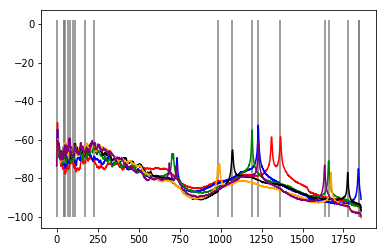

In [55]:
start=500
end=1500
#plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_nakamura[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin_nakamura[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[2], axis=0), "green")
plt.plot(np.mean(feature_per_coin_nakamura[3], axis=0), "black")
plt.plot(np.mean(feature_per_coin_nakamura[4], axis=0), "orange")
plt.plot(np.mean(feature_per_coin_nakamura[5], axis=0), "purple")

plt.vlines(freqs_nakamura, ymin=-100, ymax=2, colors="gray")

NameError: name 'freqs_naito' is not defined

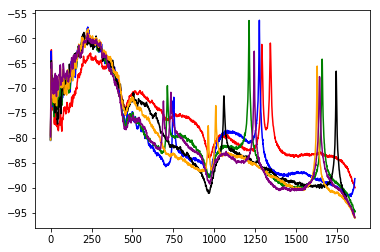

In [23]:
start=500
end=1500
#plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_naito[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin_naito[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_naito[2], axis=0), "green")
plt.plot(np.mean(feature_per_coin_naito[3], axis=0), "black")
plt.plot(np.mean(feature_per_coin_naito[4], axis=0), "orange")
plt.plot(np.mean(feature_per_coin_naito[5], axis=0), "purple")

plt.vlines(freqs_naito, ymin=-100, ymax=2, colors="gray")

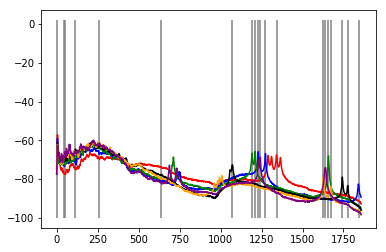

In [78]:
start=500
end=1500
#plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_LEARN[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin_LEARN[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_LEARN[2], axis=0), "green")
plt.plot(np.mean(feature_per_coin_LEARN[3], axis=0), "black")
plt.plot(np.mean(feature_per_coin_LEARN[4], axis=0), "orange")
plt.plot(np.mean(feature_per_coin_LEARN[5], axis=0), "purple")

plt.vlines(freqs, ymin=-100, ymax=2, colors="gray")

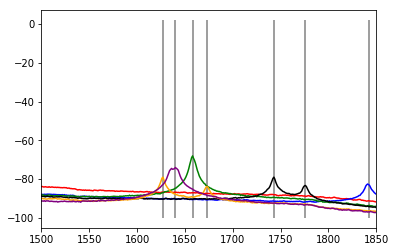

In [91]:
start = 1500
end=1850
plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_LEARN[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin_LEARN[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_LEARN[2], axis=0), "green")
plt.plot(np.mean(feature_per_coin_LEARN[3], axis=0), "black")
plt.plot(np.mean(feature_per_coin_LEARN[4], axis=0), "orange")
plt.plot(np.mean(feature_per_coin_LEARN[5], axis=0), "purple")

plt.vlines(freqs, ymin=-100, ymax=2, colors="gray")

In [2]:
start = 1250
end = 1500

plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_naito[0], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[0], axis=0), "red")
# plt.plot(np.mean(feature_per_coin[0], axis=0), "orange")


NameError: name 'plt' is not defined

NameError: name 'freqs_nakamura' is not defined

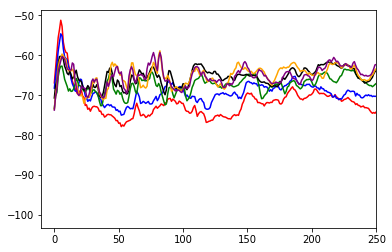

In [81]:
start=-10
end=250
plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin_nakamura[0], axis=0), "red")
plt.plot(np.mean(feature_per_coin_nakamura[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[2], axis=0), "green")
plt.plot(np.mean(feature_per_coin_nakamura[3], axis=0), "black")
plt.plot(np.mean(feature_per_coin_nakamura[4], axis=0), "orange")
plt.plot(np.mean(feature_per_coin_nakamura[5], axis=0), "purple")

plt.vlines(freqs_nakamura, ymin=-100, ymax=2, colors="gray")

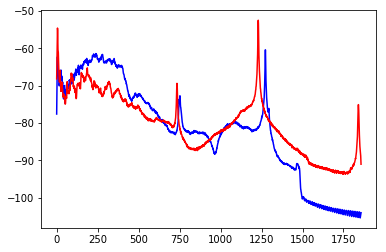

In [97]:
start = -100
end = 1875

plt.xlim(start, end)

plt.plot(np.mean(feature_per_coin_naito[1], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[1], axis=0), "red")
# plt.plot(np.mean(feature_per_coin[1], axis=0), "orange")

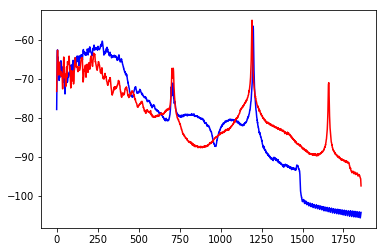

In [98]:
start = -100
end = 1875

plt.xlim(start, end)

plt.plot(np.mean(feature_per_coin_naito[2], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[2], axis=0), "red")
# plt.plot(np.mean(feature_per_coin[2], axis=0), "orange")

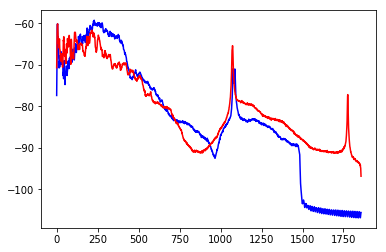

In [88]:
start = -100
end = 1875

plt.xlim(start, end)

plt.plot(np.mean(feature_per_coin_naito[3], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[3], axis=0), "red")

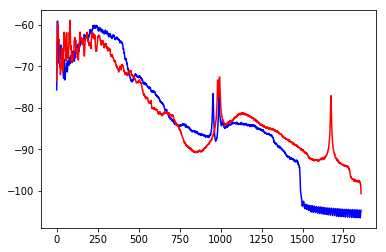

In [89]:
start = -100
end = 1875

plt.xlim(start, end)

plt.plot(np.mean(feature_per_coin_naito[4], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[4], axis=0), "red")

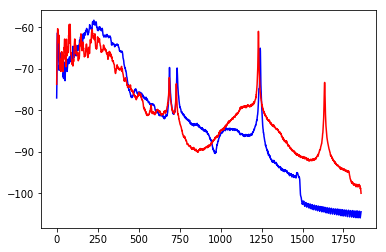

In [90]:
start = -100
end = 1875

plt.xlim(start, end)

plt.plot(np.mean(feature_per_coin_naito[5], axis=0), "blue")
plt.plot(np.mean(feature_per_coin_nakamura[5], axis=0), "red")

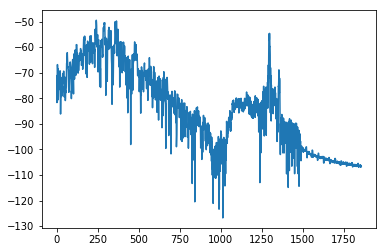

In [48]:
plt.plot(feature_per_coin[0][0])

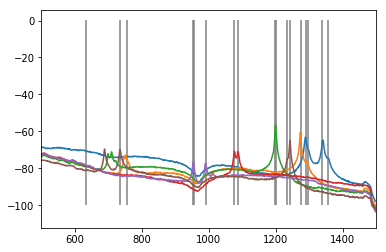

In [87]:
start=500
end=1500
plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin[0], axis=0))
plt.plot(np.mean(feature_per_coin[1], axis=0))
plt.plot(np.mean(feature_per_coin[2], axis=0))
plt.plot(np.mean(feature_per_coin[3], axis=0))
plt.plot(np.mean(feature_per_coin[4], axis=0))
plt.plot(np.mean(feature_per_coin[5], axis=0))

plt.vlines(freqs_naito, ymin=-100, ymax=0.15000, colors="gray")

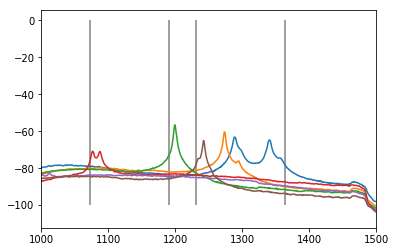

In [31]:
start=1000
end=1500
plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin[0], axis=0))
plt.plot(np.mean(feature_per_coin[1], axis=0))
plt.plot(np.mean(feature_per_coin[2], axis=0))
plt.plot(np.mean(feature_per_coin[3], axis=0))
plt.plot(np.mean(feature_per_coin[4], axis=0))
plt.plot(np.mean(feature_per_coin[5], axis=0))

plt.vlines(freqs_, ymin=-100, ymax=0, colors="gray")

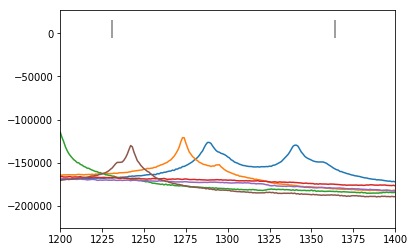

In [32]:
start=1200
end=1400
plt.xlim(start, end)
plt.plot(np.sum(feature_per_coin[0], axis=0))
plt.plot(np.sum(feature_per_coin[1], axis=0))
plt.plot(np.sum(feature_per_coin[2], axis=0))
plt.plot(np.sum(feature_per_coin[3], axis=0))
plt.plot(np.sum(feature_per_coin[4], axis=0))
plt.plot(np.sum(feature_per_coin[5], axis=0))

plt.vlines(freqs, ymin=-5000, ymax=15000, colors="gray")

In [ ]:
%timeit makePrediction(features[0][0][:, freqs], sigma, mu)

In [79]:
acc = 0
for c in range(0, 6) :
    for cc in range(0, 100) :
        predicted = makePrediction(features_TEST[c][cc][:, freqs], sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma)
        if(predicted == c) :
            acc += 1
            
acc /= (100 * 6)

In [80]:
acc

0.9916666666666667

In [68]:
freqs_naito

array([1199, 1289, 1242, 1274,  954, 1357, 1075, 1233, 1295, 1087,  757,
        990,  736, 1338, 1201,  633,    5,  335,   51,  957])

In [35]:
def getNewFile(filename, sigma, mu, detSigma, invSigma, freqs) :
    wavefile = wave.open(filename, "r")
    framerate = wavefile.getframerate()
    data = wavefile.readframes(wavefile.getnframes())
    wavefile.close()
    x = np.frombuffer(data, dtype="int16")
    x = x.astype("float64")
    BinSize = 0.05 * framerate

    f = makeFeature(x, framerate)[:, freqs]

    predicted = makePrediction(f, sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma)

    return predicted

In [36]:
getNewFile("./CoinData/050-17.wav", sigma, mu, detSigma, invSigma, freqs)

3

In [31]:
def makeMu(data) :
    mu = np.average(data, 0)
    return mu

def makeSigma(data) :
    sigma = np.cov(data, rowvar=0)
    return sigma



In [32]:
numFreqs = 20
mu = np.zeros([Coins, numFreqs])
sigma = np.zeros([Coins, numFreqs, numFreqs])
detSigma = np.zeros(Coins)
invSigma = np.zeros([Coins, numFreqs, numFreqs])

tempX = X[:, freqs]

for c in range(0, Coins) :
    tempF = tempX[np.where(Y == c)]
    mu[c, :] = makeMu(tempF)
    sigma[c, :, :] = makeSigma(tempF)
    detSigma[c] = np.linalg.det(sigma[c, :, :])
    invSigma[c, :, :] = np.linalg.inv(sigma[c, :, :])

In [26]:
tempF.shape

(400, 20)

In [38]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 2 ** 11
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

def getNewSound(sigma, mu, detSigma, invSigma, freqs) :
    p = pyaudio.PyAudio()
    
    print("* 3秒後にコインを落としてください")
    print("* 3")
    sleep(1)
    print("* 2")
    sleep(1)
    print("* 1")
    sleep(1)
    print("* 録音開始")

    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

    print("* コインを落としてください")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)) :
        data = stream.read(CHUNK)
        frames.append(data)
        
    print("* 録音終了")
    
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    predicted = getNewFile(WAVE_OUTPUT_FILENAME, sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma, freqs=freqs)
    print(coins[predicted] + "円")
    #framerate = RATE
    #data = wavefile.readframes(wavefile.getnframes())
    #wavefile.close()
    #x = np.frombuffer(data, dtype="int16")
    #x = x.astype("float64")
    #BinSize = 0.05 * framerate

    #f = makeFeature.makeFeature(x, framerate)[:, freqs]

    #predicted = makePrediction(f, sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma)

    #return predicted
    return frames

In [35]:
getNewFile("CoinData/50en.wav", sigma, mu, detSigma, invSigma, freqs)

3

In [50]:
frames = getNewSound(sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma, freqs=freqs)

* 3秒後にコインを落としてください
* 3
* 2
* 1
* 録音開始
* コインを落としてください
* 録音終了
001円


In [39]:
coins

['001', '005', '010', '050', '100', '500']

<function makeFeature.makeFeature>

* 3秒後にコインを落としてください
* 3
* 2
* 1
* 録音開始
* 録音終了


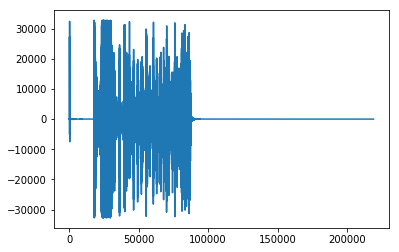

In [64]:
p = pyaudio.PyAudio()
    


print("* 3秒後にコインを落としてください")
print("* 3")
sleep(1)
print("* 2")
sleep(1)
print("* 1")
sleep(1)
print("* 録音開始")

stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)) :
    data = stream.read(CHUNK)
    frames.append(data)
        
print("* 録音終了")
    
stream.stop_stream()
stream.close()
p.terminate()
    
wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

wavefile = wave.open(WAVE_OUTPUT_FILENAME, "r")

data = wavefile.readframes(wavefile.getnframes())
wavefile.close()
x = np.frombuffer(data, dtype="int16")
x = x.astype('float64')

plt.plot(x)

In [103]:
makeFeature(x, RATE).shape

(20, 1858)

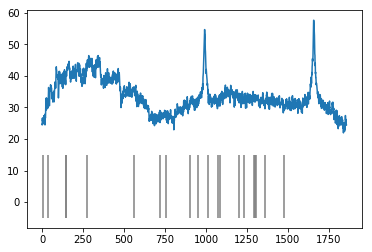

In [65]:
plt.plot(np.mean(makeFeature(x, RATE), axis=0))
plt.vlines(freqs, ymin=-5, ymax=15, colors="gray")

In [66]:
makePrediction(makeFeature(x, RATE)[:, freqs], sigma=sigma, mu=mu, detSigma=detSigma, invSigma=invSigma)

0

array([[  5.31606002e+01,   5.27973192e+01,   5.27909958e+01, ...,
          4.12702835e+01,   4.03296961e+01,   4.00217164e+01],
       [  1.77902264e+01,   1.75955144e+01,   1.79426898e+01, ...,
          8.91544752e-01,   1.94950778e+00,   6.07435015e-01],
       [ -1.15697122e+01,  -1.70304137e+01,  -1.24913726e+01, ...,
         -2.10924521e+01,  -1.93992415e+01,  -2.93634459e+01],
       ..., 
       [ -8.69313876e-01,   9.83553725e+00,   2.39685201e+00, ...,
          1.12705430e+01,   9.33735876e+00,   7.93590790e+00],
       [ -3.48056197e+00,   9.40505121e+00,  -4.75835543e-02, ...,
          1.39075278e+01,   1.07910945e+01,   1.03642025e+01],
       [ -1.07639283e+00,   2.94937878e+00,  -2.79716351e-01, ...,
         -1.25200107e+01,   8.18800760e+00,  -1.07402565e-01]])

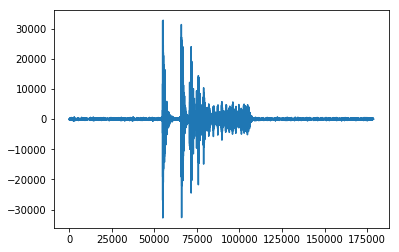

In [41]:
plt.plot(x)

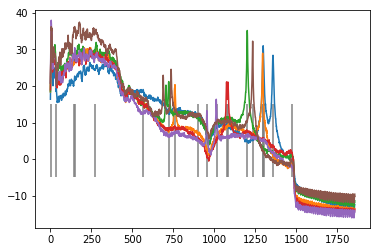

In [60]:
start=500
end=1500
#plt.xlim(start, end)
plt.plot(np.mean(feature_per_coin[0], axis=0))
plt.plot(np.mean(feature_per_coin[1], axis=0))
plt.plot(np.mean(feature_per_coin[2], axis=0))
plt.plot(np.mean(feature_per_coin[3], axis=0))
plt.plot(np.mean(feature_per_coin[4], axis=0))
plt.plot(np.mean(feature_per_coin[5], axis=0))

plt.vlines(freqs, ymin=-5, ymax=15, colors="gray")

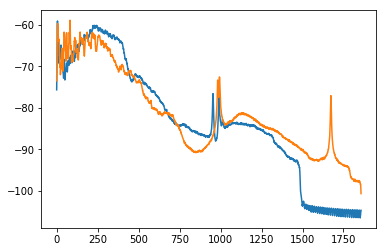

In [21]:
plt.plot(np.mean(feature_per_coin_naito[4], axis=0))
plt.plot(np.mean(feature_per_coin_nakamura[4], axis=0))

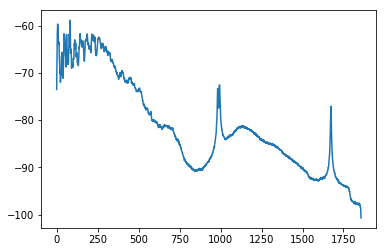

期待値 0.166...での正解率0.5

そこそこ当たってそう

本番

非常に時間がかかることが予想される

In [152]:
and

SyntaxError: invalid syntax (<ipython-input-152-901285a5a2ab>, line 1)

In [35]:
D = 2
freqs, sigma, mu = detectFreqs(features, D)

preparation
main loop start
********************************
major loop
--------------------------------
('minor loop : ', 0)
('Selected freqs', array([5, 1]))
('R=', 0.9968268453097271)
--------------------------------
('minor loop : ', 1)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
********************************
major loop
--------------------------------
('minor loop : ', 0)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
('minor loop : ', 1)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
done


In [9]:
import numpy as np
from numpy import fft

In [13]:
temp = fft.fft([0, 1, 2, 3, 4])

In [15]:
np.abs(temp)

array([ 10.        ,   4.25325404,   2.62865556,   2.62865556,   4.25325404])

そもそもの計算が正しいか簡単に確認

In [13]:
def culR(feature, sigma, mu) :
    detSigma = np.linalg.det(sigma)
    invSigma = np.linalg.inv(sigma)
    d = sigma.shape[0]
    x_muc = np.matrix(feature - mu).T

    res = ((2 * np.pi) ** (-d / 2.0) * detSigma ** (-0.5) * np.exp(-x_muc.T.dot(invSigma).dot(x_muc) / 2))
    
    return res

In [27]:
culR(np.array([0, 0]), np.array([[1, 0], [0, 1]]) * 0.1, np.array([0, 0]))

matrix([[ 1.59154943]])

In [20]:
np.linalg.inv((np.array([[1, 0], [0, 1]])))

array([[ 1.,  0.],
       [ 0.,  1.]])

In [24]:
x = np.array([0, 0])
mu = np.array([0, 0])
x_muc = np.matrix(x - mu).T
sigma = np.array([[1, 0], [0, 1]]) * 100
invSigma = np.linalg.inv(sigma)

np.exp(-x_muc.T.dot(invSigma).dot(x_muc) / 2)

matrix([[ 1.]])

In [9]:
x = np.array([0, 1, 2])

In [18]:
x = np.array([x]).T

In [19]:
x

array([[0],
       [1],
       [2]])

In [22]:
invSigma = np.array(range(0, 9)).reshape(3, 3)

In [23]:
invSigma

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [27]:
np.dot(x.T, invSigma).dot(x)

array([[60]])

In [29]:
np.exp(invSigma)

array([[  1.00000000e+00,   2.71828183e+00,   7.38905610e+00],
       [  2.00855369e+01,   5.45981500e+01,   1.48413159e+02],
       [  4.03428793e+02,   1.09663316e+03,   2.98095799e+03]])

In [23]:
temp1 = np.random.random(size=[10, 5])
temp2 = np.array([1, 2, 3, 4, 5])

In [24]:
temp1 - temp2

array([[-0.75548225, -1.24964047, -2.9738428 , -3.15987994, -4.42099502],
       [-0.05162787, -1.74623336, -2.62967871, -3.93480647, -4.32583643],
       [-0.5684011 , -1.59850595, -2.9498818 , -3.17115349, -4.47818155],
       [-0.39945419, -1.12748661, -2.97947945, -3.68589437, -4.65914087],
       [-0.25706016, -1.76536543, -2.21850173, -3.14305407, -4.45603376],
       [-0.46668178, -1.38401511, -2.88355964, -3.14920844, -4.74136581],
       [-0.98131734, -1.07002719, -2.88721637, -3.88495606, -4.60525238],
       [-0.71921804, -1.1725652 , -2.01872411, -3.46786546, -4.34353485],
       [-0.88880065, -1.23024017, -2.79290115, -3.39353379, -4.81088962],
       [-0.19665272, -1.44072596, -2.90678227, -3.02124015, -4.60273412]])

In [25]:
np.sum(temp1 - temp2, axis=1)

array([-12.55984047, -12.68818285, -12.76612389, -12.85145549,
       -11.84001516, -12.62483077, -13.42876933, -11.72190767,
       -13.11636538, -12.16813521])

In [26]:
args = np.argmax(temp1, axis=0)

In [27]:
temp1

array([[ 0.24451775,  0.75035953,  0.0261572 ,  0.84012006,  0.57900498],
       [ 0.94837213,  0.25376664,  0.37032129,  0.06519353,  0.67416357],
       [ 0.4315989 ,  0.40149405,  0.0501182 ,  0.82884651,  0.52181845],
       [ 0.60054581,  0.87251339,  0.02052055,  0.31410563,  0.34085913],
       [ 0.74293984,  0.23463457,  0.78149827,  0.85694593,  0.54396624],
       [ 0.53331822,  0.61598489,  0.11644036,  0.85079156,  0.25863419],
       [ 0.01868266,  0.92997281,  0.11278363,  0.11504394,  0.39474762],
       [ 0.28078196,  0.8274348 ,  0.98127589,  0.53213454,  0.65646515],
       [ 0.11119935,  0.76975983,  0.20709885,  0.60646621,  0.18911038],
       [ 0.80334728,  0.55927404,  0.09321773,  0.97875985,  0.39726588]])

In [28]:
args

array([1, 6, 7, 9, 1])

In [29]:
temp1[args, np.array([0, 1, 2, 3, 4])]

array([ 0.94837213,  0.92997281,  0.98127589,  0.97875985,  0.67416357])

In [30]:
np.array(range(0, 10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.exp(temp1[args, np.array(range(0, 5))] / np.sum(temp1, axis=0))

array([ 1.22277933,  1.16140318,  1.42704794,  1.17755755,  1.15947989])

In [33]:
temp1[args]

array([[ 0.94837213,  0.25376664,  0.37032129,  0.06519353,  0.67416357],
       [ 0.01868266,  0.92997281,  0.11278363,  0.11504394,  0.39474762],
       [ 0.28078196,  0.8274348 ,  0.98127589,  0.53213454,  0.65646515],
       [ 0.80334728,  0.55927404,  0.09321773,  0.97875985,  0.39726588],
       [ 0.94837213,  0.25376664,  0.37032129,  0.06519353,  0.67416357]])

In [35]:
temp2[args]

IndexError: index 6 is out of bounds for axis 1 with size 5

In [37]:
temp2[np.array([0, 1, 0, 0, 3, 4, 2])]

array([1, 2, 1, 1, 4, 5, 3])

In [21]:
 3 ** 9

19683

In [22]:
3 ** 4

81

In [21]:
temp = np.array([[1, 2, 3], [4, 5, 6]])

In [22]:
temp

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
np.sum(temp, axis=1)

array([ 6, 15])

In [25]:
np.cov(temp)

array([[ 1.,  1.],
       [ 1.,  1.]])

In [47]:
mu = np.array([2.5, 3.5, 4.5])
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[1, 3, 5], [7, 11, 17]])
mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [48]:
print(np.array([x[0] - mu]).dot(mat).dot(np.array([y[0]]).T),
      np.array([x[1] - mu]).dot(mat).dot(np.array([y[1]]).T))

[[-220.5]] [[ 832.5]]


In [49]:
np.sum(np.dot(x - mu, mat) * y, axis=1)

array([-220.5,  832.5])

In [41]:
np.array(range(1, 44))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

In [48]:
for _ in range(0, 1000) :
    print(np.sort(np.random.choice(np.array(range(1, 44)), 6, replace=False)))

[ 1  8 13 28 30 32]
[10 16 21 26 31 38]
[ 3 11 12 19 24 41]
[ 7  9 12 16 20 32]
[ 2 17 27 32 34 39]
[ 1  3 25 29 30 37]
[ 6  9 13 32 34 43]
[ 7 14 36 39 41 42]
[16 19 20 22 28 35]
[ 9 13 18 19 25 29]
[ 5 10 23 32 38 41]
[ 1 12 25 27 32 42]
[ 1 12 26 28 32 41]
[ 4  7 25 27 34 40]
[ 3 17 21 25 36 38]
[10 15 20 23 34 38]
[ 1  2  3 23 31 42]
[ 2  7 12 19 20 43]
[ 3 16 27 28 33 42]
[ 3  5 16 26 34 42]
[ 4  5  7 24 29 34]
[ 6  8 16 20 29 38]
[11 16 30 35 37 43]
[16 23 25 34 35 37]
[18 29 30 35 36 40]
[ 2  6  9 12 20 35]
[ 6  9 12 24 31 34]
[11 15 16 19 35 39]
[ 8 12 17 33 39 41]
[ 3  7 10 34 35 36]
[ 4  8 10 32 34 43]
[ 1  5  8 11 17 36]
[ 1  8 10 12 13 39]
[ 2  9 14 19 21 39]
[ 3 13 16 36 39 40]
[ 3  5 20 24 28 31]
[11 18 27 30 32 33]
[ 9 22 26 28 35 37]
[11 14 23 27 38 43]
[ 1 15 19 24 33 36]
[11 14 17 27 37 40]
[ 1 12 15 32 40 43]
[ 3  4 12 19 41 42]
[ 3 12 21 24 32 36]
[ 2  6  7 12 19 29]
[ 8 15 19 25 31 41]
[ 9 15 24 30 35 41]
[ 3  4 14 24 28 32]
[ 5  7 28 29 30 43]
[ 5  7 19 20 26 32]
